# Bike Sharing Dataset

## Problem Statement: -
    Exploratory data analysis is performed on the mentioned dataset to find the following: -
        1. Which seasons has the maximum number of bikes being rented?
        2. At what duration of time in a day, the count of bike rent has tha maximum?
        3. When is the most bikes are rented during the holidays or no-holidays?
    

## Data Set Information: -
    Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Here, we have daily data for 2 years. The target variable is the total count of bikes rented during each day. The independent variables are various factors like humidity, temperature, windspeed, weathersituation, season etc.

### Data Source Link - https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

## Attribute Information: -
    Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

        - instant: record index
        - dteday : date
        - season : season (1:winter, 2:spring, 3:summer, 4:fall)
        - yr : year (0: 2011, 1:2012)
        - mnth : month ( 1 to 12)
        - hr : hour (0 to 23)
        - holiday : weather day is holiday or not (extracted from [Web Link])
        - weekday : day of the week
        - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
        + weathersit :
            - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 
                 only in hourly scale)
        - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16,
                 t_max=+50 (only in hourly scale)
        - hum: Normalized humidity. The values are divided to 100 (max)
        - windspeed: Normalized wind speed. The values are divided to 67 (max)
        - casual: count of casual users
        - registered: count of registered users
        - cnt: count of total rental bikes including both casual and registered

## Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
hour = pd.read_csv("D:\Praxis-2022 (Kol)\Term - 02\C22 - PPP\Bike Sharing Dataset\hour.csv")
day = pd.read_csv("D:\Praxis-2022 (Kol)\Term - 02\C22 - PPP\Bike Sharing Dataset\day.csv")

In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Descriptive analysis

In [5]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Finding the Missing Value

In [8]:
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Missing Values
#total = hour.isnull().sum().sort_values(ascending = False)
#percent = hour.isnull().sum()/hour.isnull().sum().sort_values(ascending = False)
#missing_data = pd.concat([total, percent], axis = 1, keys = ["Total", "Percent"])
#missing_data.head(10)

In [10]:
#cnt_graph = sns.distplot(hour["cnt"])
#cnt_graph

In [11]:
#print("Skewness : %f" % hour["cnt"].skew())
#print("Kurtosis : %f" % hour["cnt"].kurt())

In [12]:
[features for features in hour.columns if hour[features].isnull().sum()>1]

[]

In [13]:
#sns.heatmap(hour.isnull(), yticklabels = False)     #in case there is a missing value

In [14]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
[features for features in day.columns if day[features].isnull().sum()>1]

[]

In [17]:
hour.dteday = pd.to_datetime(hour.dteday)

In [18]:
day.dteday = pd.to_datetime(day.dteday)

In [19]:
#hour["day_name"] = hour["dteday"].day_name()

In [20]:
#hour["day_name"] = hour["dteday"].strftime("%a")

In [21]:
hour.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [22]:
#hour = hour.drop("atemp", axis=1)

In [23]:
day.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


### Merging both the file (hour and day)

In [24]:
final_merge = pd.merge(hour, day, on = "dteday", how = "left")

In [25]:
final_merge.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [26]:
final_merge.dtypes

instant_x                int64
dteday          datetime64[ns]
season_x                 int64
yr_x                     int64
mnth_x                   int64
hr                       int64
holiday_x                int64
weekday_x                int64
workingday_x             int64
weathersit_x             int64
temp_x                 float64
atemp_x                float64
hum_x                  float64
windspeed_x            float64
casual_x                 int64
registered_x             int64
cnt_x                    int64
instant_y                int64
season_y                 int64
yr_y                     int64
mnth_y                   int64
holiday_y                int64
weekday_y                int64
workingday_y             int64
weathersit_y             int64
temp_y                 float64
atemp_y                float64
hum_y                  float64
windspeed_y            float64
casual_y                 int64
registered_y             int64
cnt_y                    int64
dtype: o

In [27]:
final_merge.columns

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')

### Feature Engineering

In [28]:
day1 = day.copy()
hour1 = hour.copy()

In [29]:
day1['season_name'] = day1['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
hour1['season_name'] = hour1['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
day1["Week_name"] = day1["weekday"].map({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"})
hour1["Week_name"] = hour1["weekday"].map({0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"})
day1["Year_name"] = day1["yr"].map({0:"2011", 1:"2012"})
hour1["Year_name"] = hour1["yr"].map({0:"2011", 1:"2012"})
day1["Month_name"] = day1["mnth"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 
                                       8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
hour1["Month_name"] = hour1["mnth"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 
                                       8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

In [30]:
day1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_name,Week_name,Year_name,Month_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Sun,2011,Jan
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Mon,2011,Jan
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Tue,2011,Jan
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Wed,2011,Jan
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Thur,2011,Jan


In [31]:
# day1[(day1.workingday==0)]["Week_name"].value_counts()

In [32]:
# day1[(day1.holiday==0) & (day1.workingday==1)]["Week_name"].value_counts()

##### Creating a column named weekened

In [33]:
def weekend(day):
    if(day in ["sat","sun"]):
        return 1
    else:
        return 0

In [34]:
day1["weekend"]=day1["Week_name"].apply(weekend)
hour1["weekend"]=hour1["Week_name"].apply(weekend)

In [35]:
day1.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_name,Week_name,Year_name,Month_name,weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Spring,Sun,2011,Jan,0
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Spring,Mon,2011,Jan,0


##### Creating a column named daytype

In [36]:
#weekend = 1, weekday_holiday=2, normal_workingday = 3

In [37]:
def daytype(day1):
    if (day1["holiday"]==0) & (day1["workingday"]==0):
        return 1
    elif (day1["holiday"]==1) & (day1["workingday"]==0):
        return 2
    elif (day1["holiday"]==0) & (day1["workingday"]==1):
        return 3

In [38]:
day1['daytype'] = day1.apply(daytype, axis=1)
hour1['daytype'] = hour1.apply(daytype, axis=1)

In [39]:
day1["daytype"] = day1["daytype"].map({1:"Weekend", 2:"Weekday_Holiday", 3:"Normal_Workingday"})
hour1["daytype"] = hour1["daytype"].map({1:"Weekend", 2:"Weekday_Holiday", 3:"Normal_Workingday"})

In [40]:
day1.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,season_name,Week_name,Year_name,Month_name,weekend,daytype
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.160446,331,654,985,Spring,Sun,2011,Jan,0,Weekend
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,...,0.248539,131,670,801,Spring,Mon,2011,Jan,0,Weekend


### EDA (Exploratory Data Analysis)

In [41]:
hour1.season_name.value_counts()

Fall      4496
Summer    4409
Spring    4242
Winter    4232
Name: season_name, dtype: int64

In [42]:
day1['season_name'].value_counts()

Fall      188
Summer    184
Spring    181
Winter    178
Name: season_name, dtype: int64

<AxesSubplot:xlabel='season_name', ylabel='cnt'>

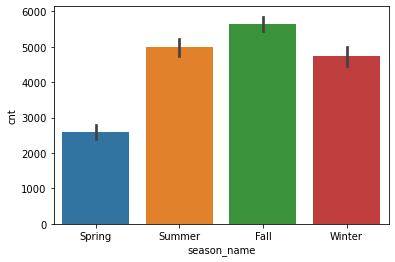

In [43]:
sns.barplot(x="season_name", y = "cnt", data = day1)

<AxesSubplot:xlabel='season_name', ylabel='cnt'>

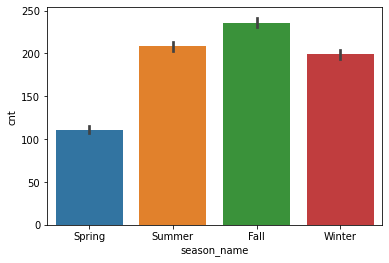

In [44]:
sns.barplot(x="season_name", y = "cnt", data = hour1)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

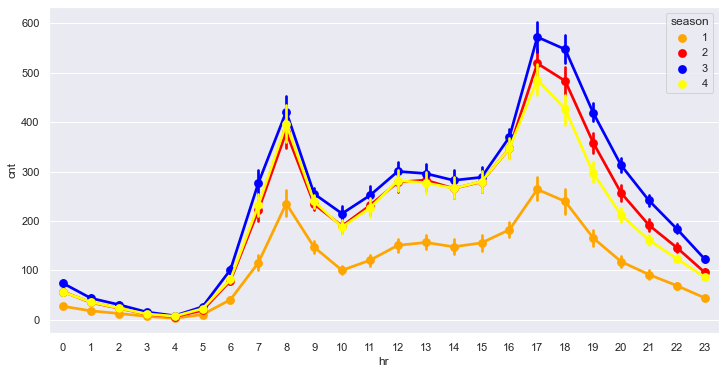

In [45]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.pointplot(x="hr", y = "cnt", data = hour1[["hr", "season", "cnt"]], hue = "season", palette = ["orange", "red", "blue", "yellow"])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

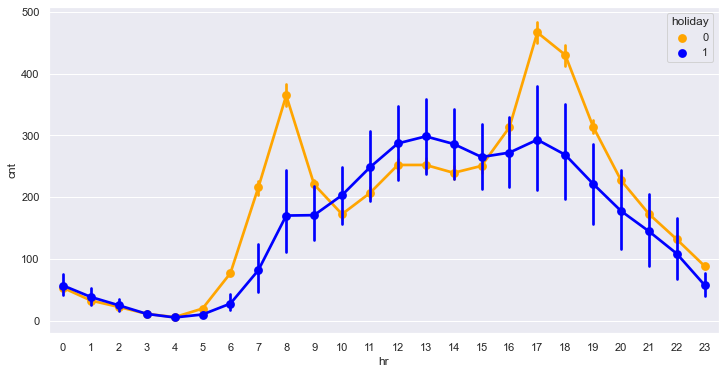

In [46]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.pointplot(x="hr", y = "cnt", data = hour1[["hr", "holiday", "cnt"]], hue = "holiday", palette = ["orange", "blue"])

<AxesSubplot:xlabel='Month_name', ylabel='cnt'>

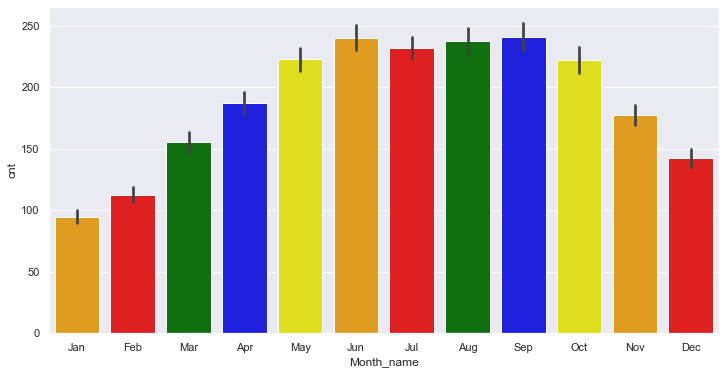

In [47]:
sns.barplot(x="Month_name", y = "cnt", data = hour1, palette = ["orange", "red", "green", "blue", "yellow"])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

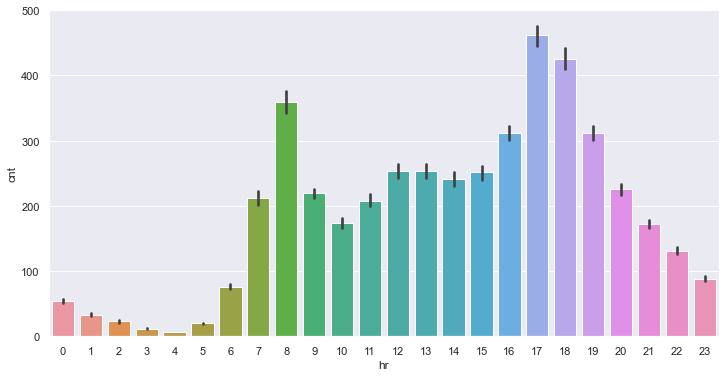

In [48]:
sns.barplot(x="hr", y = "cnt", data = hour1)

In [49]:
#hour.plot.scatter(x = "cnt", y = "casual")

<AxesSubplot:>

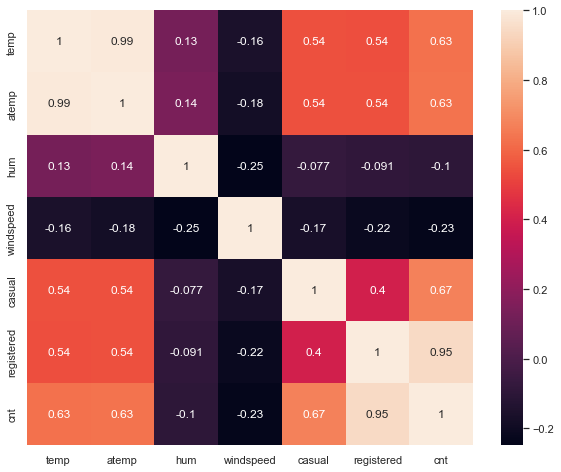

In [50]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(day[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True)

Observations: -
    
    1. temp and atemp are very highly correlated (significant p value) and hence one of them should be dropped to prevent the multicollinearity. We will drop atemp which is the adjusted temperature and keep temp in our dataset. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results.

    2. temp and cnt have high correlation (significant p value) and since here, our objective is to predict the count of bike rents, temp can be considered as an important predictor variable.

    3. Humidity is very weakly correlated with the other variables and hence, we can keep it. It is also weakly negatively correlated with cnt. It might not be a very good predictor in bivariate regression to predict cnt.

    4. Similarly windspeed is weakly associated with cnt and may not be that good a predictor but still slightly better than humidity.

    5. Registered and casual bike rents are added to get the cnt column and they are showing more or less similar behavior with the other features and are highly correlated with cnt. Hence, we will drop casual and registered and work with only cnt.


In [51]:
hour[["casual", "registered", "cnt"]].corr()

,casual,registered,cnt
casual,1.000000,0.506618,0.694564
registered,0.506618,1.000000,0.972151
cnt,0.694564,0.972151,1.000000


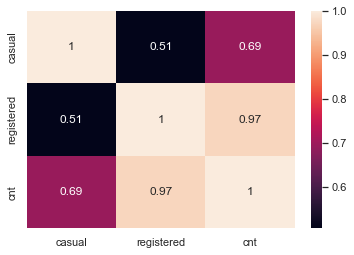

In [52]:
sns.set(rc={"figure.figsize":(6, 4)})
c = sns.heatmap(data = hour[["casual", "registered", "cnt"]].corr(), annot = True)
plt.show()

#### Replacing zero values of windspeed by mean

In [53]:
day1["windspeed_mean"] = day1["windspeed"].map(lambda x: day1.windspeed.mean() if x == 0 else x)
day1["windspeed_mean"]

0      0.160446
1      0.248539
2      0.248309
3      0.160296
4      0.186900
         ...   
726    0.350133
727    0.155471
728    0.124383
729    0.350754
730    0.154846
Name: windspeed_mean, Length: 731, dtype: float64

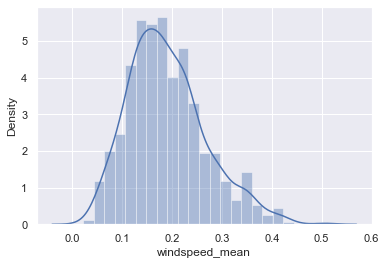

In [54]:
sns.distplot(day1["windspeed_mean"])
None

#### Replacing zero values of humidity by mean

In [55]:
day1["hum_mean"] = day1["hum"].map(lambda x: day1.hum.mean() if x == 0 else x)
day1["hum_mean"]

0      0.805833
1      0.696087
2      0.437273
3      0.590435
4      0.436957
         ...   
726    0.652917
727    0.590000
728    0.752917
729    0.483333
730    0.577500
Name: hum_mean, Length: 731, dtype: float64

<AxesSubplot:xlabel='hum_mean', ylabel='Density'>

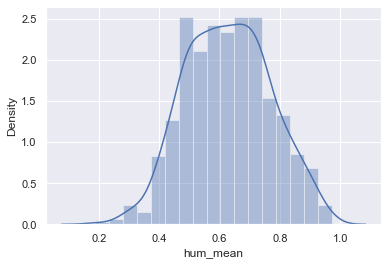

In [56]:
sns.distplot(day1["hum_mean"])

<AxesSubplot:>

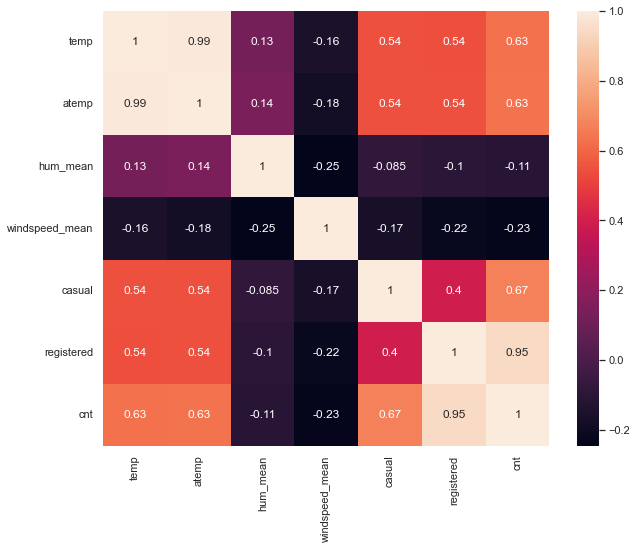

In [57]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(day1[['temp','atemp','hum_mean','windspeed_mean','casual','registered','cnt']].corr(),annot=True)

In [58]:
day1.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,season_name,Week_name,Year_name,Month_name,weekend,daytype,windspeed_mean,hum_mean
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,Spring,Sun,2011,Jan,0,Weekend,0.160446,0.805833
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,...,670,801,Spring,Mon,2011,Jan,0,Weekend,0.248539,0.696087


In [59]:
day2 = day1.copy()

In [60]:
day2 = pd.get_dummies(day2, columns = ['Week_name'])
day2 = pd.get_dummies(day2, columns = ['daytype'])
day2 = pd.get_dummies(day2, columns = ['season_name'])
day2 = pd.get_dummies(day2, columns = ['Year_name'])
day2 = pd.get_dummies(day2, columns = ['Month_name'])

In [61]:
day2.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Month_name_Dec,Month_name_Feb,Month_name_Jan,Month_name_Jul,Month_name_Jun,Month_name_Mar,Month_name_May,Month_name_Nov,Month_name_Oct,Month_name_Sep
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,0,1,0,0,0,0,0,0,0
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,...,0,0,1,0,0,0,0,0,0,0


In [62]:
day2.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'weekend', 'windspeed_mean', 'hum_mean',
       'Week_name_Fri', 'Week_name_Mon', 'Week_name_Sat', 'Week_name_Sun',
       'Week_name_Thur', 'Week_name_Tue', 'Week_name_Wed',
       'daytype_Normal_Workingday', 'daytype_Weekday_Holiday',
       'daytype_Weekend', 'season_name_Fall', 'season_name_Spring',
       'season_name_Summer', 'season_name_Winter', 'Year_name_2011',
       'Year_name_2012', 'Month_name_Apr', 'Month_name_Aug', 'Month_name_Dec',
       'Month_name_Feb', 'Month_name_Jan', 'Month_name_Jul', 'Month_name_Jun',
       'Month_name_Mar', 'Month_name_May', 'Month_name_Nov', 'Month_name_Oct',
       'Month_name_Sep'],
      dtype='object')

In [63]:
day2.shape

(731, 47)

In [64]:
day1.groupby("holiday").sum()

,instant,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend,windspeed_mean,hum_mean
holiday,,,,,,,,,,,,,,,,,
0,259444,1774,355,4621,2153,500,993,352.361028,337.437728,446.081772,135.185714,597658,2616586,3214244,0,135.185714,446.709666
1,8102,51,11,145,38,0,27,9.765252,9.315038,12.908788,4.059706,22359,56076,78435,0,4.059706,12.908788


In [65]:
day1['Holiday_name'] = day1['holiday'].replace([0,1],['Holiday','No-Holiday'])

In [66]:
reg_holi = day1.groupby("Holiday_name")["cnt"].sum()
reg_holi

Holiday_name
Holiday       3214244
No-Holiday      78435
Name: cnt, dtype: int64

<AxesSubplot:xlabel='Holiday_name'>

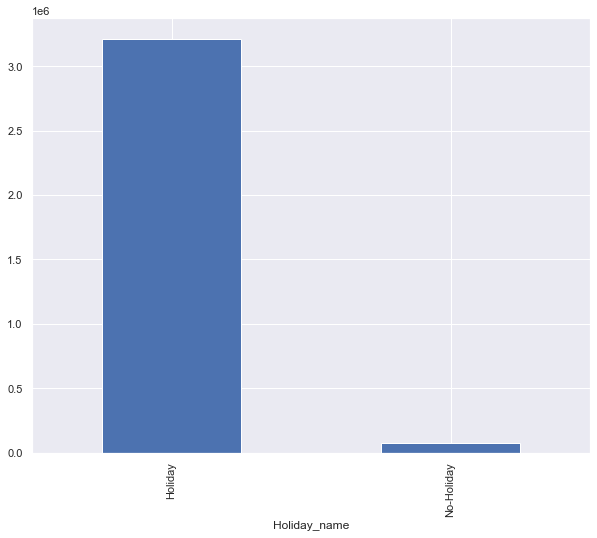

In [67]:
reg_holi.plot.bar()

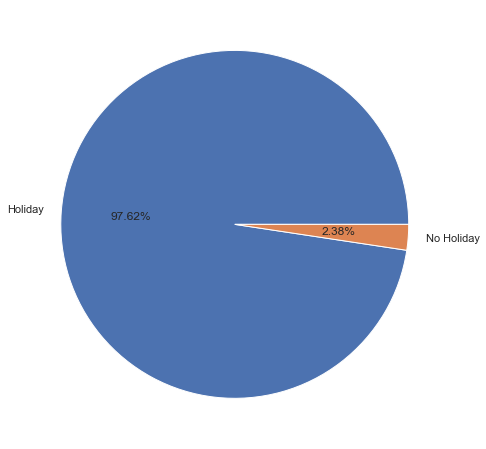

In [68]:
plt.pie(reg_holi, labels = ["Holiday", "No Holiday"], autopct = '%1.2f%%')
None

In [69]:
# sns.set(rc={"figure.figsize":(16, 12)})
# c = sns.heatmap(data = day1.corr(), annot = True, cmap="coolwarm")
# plt.show()

## Correlation

AxesSubplot(0.125,0.125;0.62x0.755)


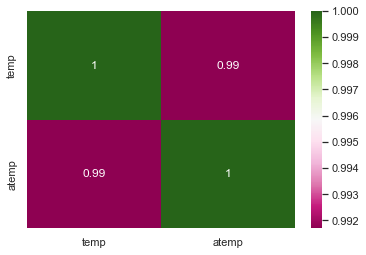

In [70]:
sns.set(rc={"figure.figsize":(6, 4)})
c = sns.heatmap(data = day1[["temp", "atemp"]].corr(), annot = True, cmap = "PiYG")
print(c)

From above heatmap, it is clearly seen that temp and atemp are higly correlated.

<AxesSubplot:xlabel='temp', ylabel='atemp'>

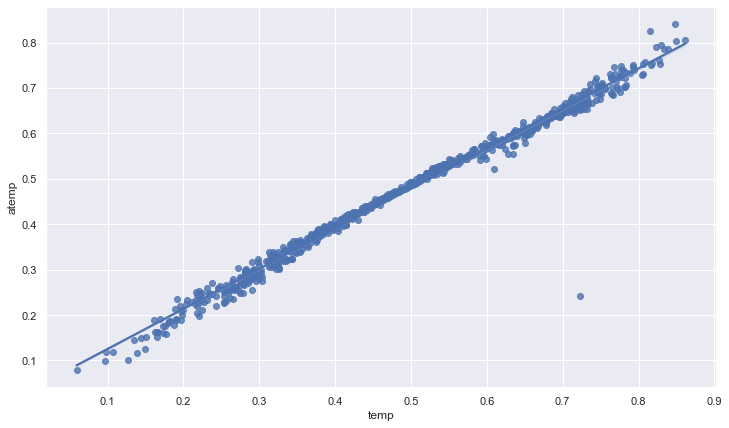

In [71]:
plt.figure(figsize=(12,7))
sns.regplot(x=day1["temp"],y=day1["atemp"])

<AxesSubplot:>

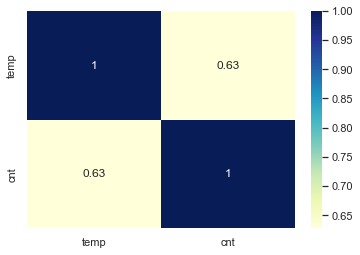

In [72]:
sns.heatmap(data = day1[["temp", "cnt"]].corr(), annot = True, cmap = "YlGnBu")

<AxesSubplot:xlabel='temp', ylabel='cnt'>

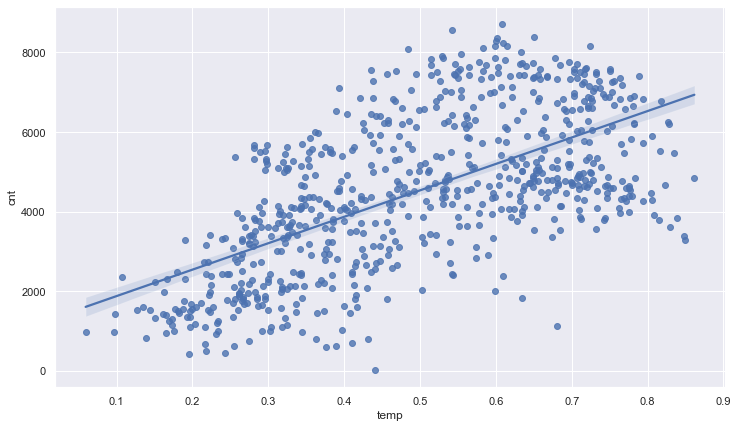

In [73]:
plt.figure(figsize=(12,7))
sns.regplot(x=day1["temp"],y=day1["cnt"])

<AxesSubplot:>

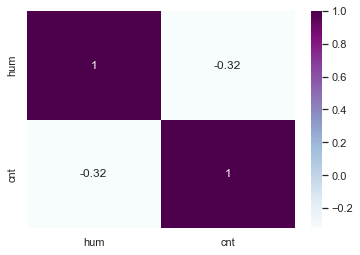

In [74]:
sns.heatmap(data = hour[["hum", "cnt"]].corr(), annot = True, cmap = "BuPu")

<AxesSubplot:xlabel='hum', ylabel='cnt'>

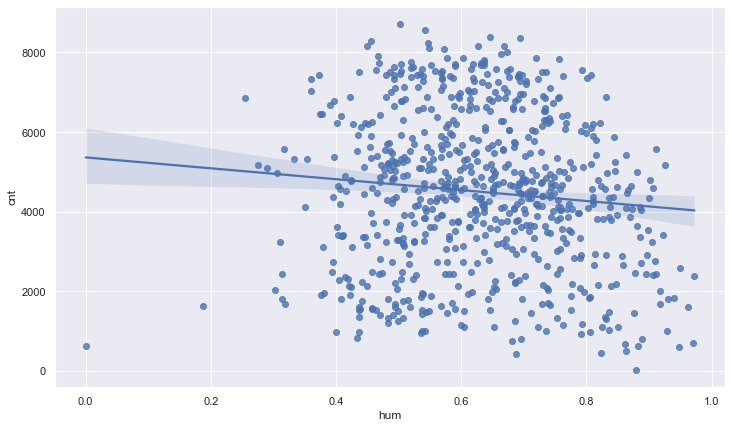

In [75]:
plt.figure(figsize=(12,7))
sns.regplot(x=day1["hum"],y=day1["cnt"])

<AxesSubplot:>

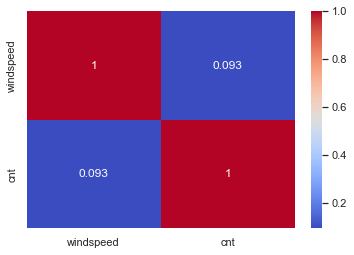

In [76]:
sns.heatmap(data = hour[["windspeed", "cnt"]].corr(), annot = True, cmap = "coolwarm")

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

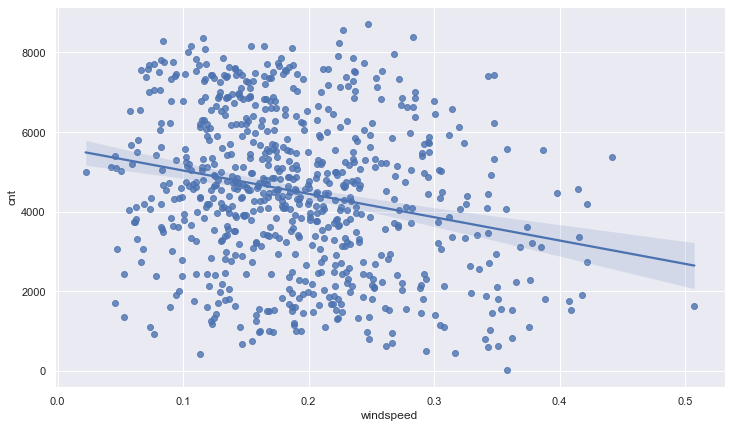

In [77]:
plt.figure(figsize=(12,7))
sns.regplot(x=day1["windspeed"],y=day1["cnt"])

# Hypothesis Testing

In [78]:
from scipy.stats import ttest_1samp
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm
from scipy.stats import ttest_ind

We perform a hypothesis test of the “significance of the correlation coefficient” to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

If p value<0.05 -> There is a significant linear relationship between x and y.

## Pearson correlation & p-value

In [79]:
stats.pearsonr(hour["temp"] , hour["atemp"])
print("correlation and p value is : ", stats.pearsonr(hour["temp"] , hour["atemp"]))

correlation and p value is :  (0.9876721390396481, 0.0)


In [80]:
stats.pearsonr(hour["temp"] , hour["cnt"])
print("correlation and p value is : ", stats.pearsonr(hour["temp"] , hour["cnt"]))

correlation and p value is :  (0.4047722757786586, 0.0)


In [81]:
stats.pearsonr(hour["hum"] , hour["cnt"])
print("correlation and p value is : ", stats.pearsonr(hour["hum"] , hour["cnt"]))

correlation and p value is :  (-0.3229107408245602, 0.0)


In [82]:
stats.pearsonr(hour['windspeed'] , hour['cnt'])
print("correlation and p value is : ", stats.pearsonr(hour['windspeed'] , hour['cnt']))

correlation and p value is :  (0.09323378392612533, 7.345742373499617e-35)


# Splitting

In [147]:
day5 = day1.copy()

In [148]:
day5.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,season_name,Week_name,Year_name,Month_name,weekend,daytype,windspeed_mean,hum_mean,Holiday_name
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,985,Spring,Sun,2011,Jan,0,Weekend,0.160446,0.805833,Holiday
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,...,801,Spring,Mon,2011,Jan,0,Weekend,0.248539,0.696087,Holiday
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,...,1349,Spring,Tue,2011,Jan,0,Normal_Workingday,0.248309,0.437273,Holiday
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,...,1562,Spring,Wed,2011,Jan,0,Normal_Workingday,0.160296,0.590435,Holiday
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,...,1600,Spring,Thur,2011,Jan,0,Normal_Workingday,0.186900,0.436957,Holiday


In [149]:
day5.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_name', 'Week_name', 'Year_name',
       'Month_name', 'weekend', 'daytype', 'windspeed_mean', 'hum_mean',
       'Holiday_name'],
      dtype='object')

In [150]:
day5.drop(['instant', 'dteday', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'season_name', 'Week_name', 'Year_name',
       'Month_name', 'weekend', 'daytype', 'Holiday_name'], axis = 1, inplace=True)

In [151]:
day5.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt,windspeed_mean,hum_mean
0,1,0,1,0,6,0,2,0.344167,985,0.160446,0.805833
1,1,0,1,0,0,0,2,0.363478,801,0.248539,0.696087
2,1,0,1,0,1,1,1,0.196364,1349,0.248309,0.437273
3,1,0,1,0,2,1,1,0.200000,1562,0.160296,0.590435
4,1,0,1,0,3,1,1,0.226957,1600,0.186900,0.436957


### Scaling down the value of cnt

In [152]:
day5["cnt"] = np.log(day5["cnt"])

In [93]:
# from sklearn.preprocessing import StandardScaler

In [94]:
# scaler = StandardScaler()

In [95]:
# norm = ['cnt']
# day5[norm] = scaler.fit_transform(day5[norm])

In [153]:
day5.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt,windspeed_mean,hum_mean
0,1,0,1,0,6,0,2,0.344167,6.892642,0.160446,0.805833
1,1,0,1,0,0,0,2,0.363478,6.685861,0.248539,0.696087
2,1,0,1,0,1,1,1,0.196364,7.207119,0.248309,0.437273
3,1,0,1,0,2,1,1,0.200000,7.353722,0.160296,0.590435
4,1,0,1,0,3,1,1,0.226957,7.377759,0.186900,0.436957


In [154]:
# defining the variables
x = day5.drop(["cnt"],axis=1)
y = day5.cnt
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sun, 26 Jun 2022   Prob (F-statistic):          7.89e-173
Time:                        16:31:26   Log-Likelihood:                -221.26
No. Observations:                 731   AIC:                             464.5
Df Residuals:                     720   BIC:                             515.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6224      0.088     86.

## Modeling

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Linear Regression

In [217]:
# Model for registered
X = day5.drop(["cnt"],axis=1)
y = day5.cnt

# Dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30 , random_state = 2)

In [218]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [219]:
X_train.shape, X_test.shape

((511, 10), (220, 10))

In [220]:
y_train.shape, y_test.shape

((511,), (220,))

In [221]:
y_pred = lr.predict(X_test)

In [222]:
lr.score(X_test, y_test)

0.7602250000356416

In [223]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is ", mse)

Mean Squared Error is  0.0650213462181652


In [224]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is ", rmse)

Root Mean Squared Error is  0.2549928356212488


In [225]:
r2 = r2_score(y_test, y_pred)
print("R squared is ", r2)

R squared is  0.7602250000356416


## Random Forest Regressor

In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
RF = RandomForestRegressor()

In [228]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [229]:
RF.score(X_test,y_test)

0.8512410673999812

In [230]:
y_pred = RF.predict(X_test)

In [231]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is ", mse)

Mean Squared Error is  0.04033992726959986


In [232]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is ", rmse)

Root Mean Squared Error is  0.2008480203278087


In [233]:
r2 = r2_score(y_test, y_pred)
print("R squared is ", r2)

R squared is  0.8512410673999812


## XgBoost Regressor

In [234]:
from xgboost import XGBRegressor

In [235]:
XG = XGBRegressor()

In [236]:
XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [237]:
XG.score(X_test,y_test)

0.8431026717949214

In [238]:
y_pred = XG.predict(X_test)

In [239]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is ", mse)

Mean Squared Error is  0.04254686893731187


In [240]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is ", rmse)

Root Mean Squared Error is  0.20626892382836506


In [241]:
r2 = r2_score(y_test, y_pred)
print("R squared is ", r2)

R squared is  0.8431026717949214
